# Visualizations

In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
folder = "JG_data"
df = pd.read_csv(folder + "/places_info.csv")

In [6]:
import folium

def plot_clusters_folium(df):
    # map_center = [df["latitude"].mean(), df["longitude"].mean()]
    m = folium.Map(location=[38.028028, -78.508516], zoom_start=14)

    # Define colors for clusters
    cluster_colors = {
        -1: "gray"  # Noise
    }
    unique_clusters = df["cluster_id"].unique()
    cmap = plt.cm.get_cmap("tab10", len(unique_clusters))

    for i, cluster in enumerate(unique_clusters):
        if cluster not in cluster_colors:
            cluster_colors[cluster] = f"#{''.join(np.random.choice(list('0123456789ABCDEF'), 6))}" 
    
    # adding points to a map
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row["latitude"], row["longitude"]],
            radius=5,
            color=cluster_colors[row["cluster_id"]],
            fill=True,
            fill_color=cluster_colors[row["cluster_id"]],
            fill_opacity=0.6,
        ).add_to(m)

    return m

plot_clusters_folium(df)

C:\Users\janic\AppData\Local\Temp\ipykernel_932\4004076833.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab10", len(unique_clusters))


### Bar Charts

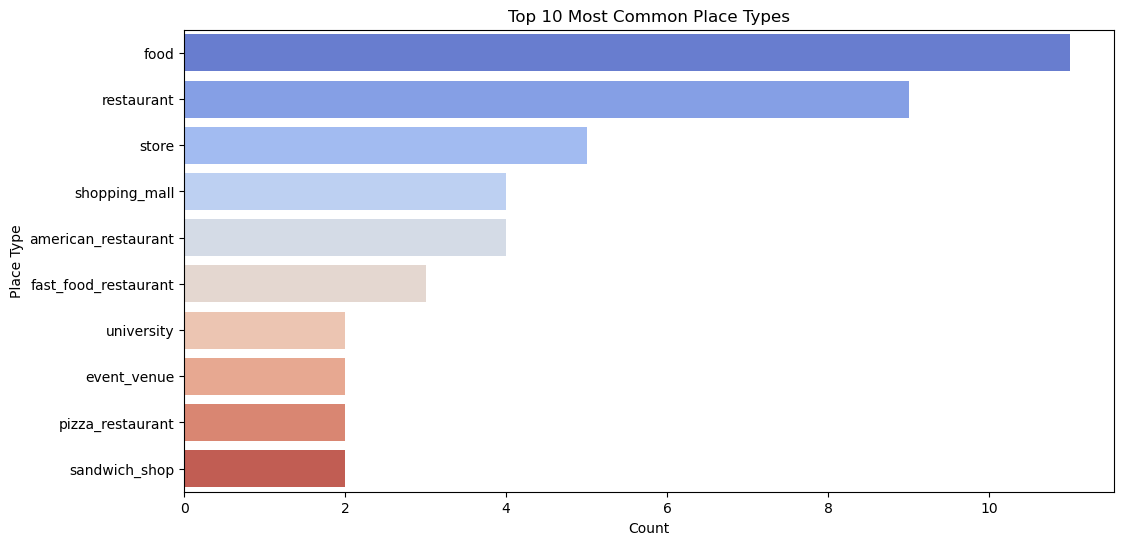

In [7]:
# MOST common types of locations that I have frequented

from collections import Counter
import ast

all_types = []
for types in df['place_types']:
    types_list = ast.literal_eval(types)
    all_types.extend(types_list)

type_counts = Counter(all_types)
top_types = type_counts.most_common(12) # get the top 12

type_df = pd.DataFrame(top_types, columns=["Place Type", "Count"])
type_df = type_df[~type_df["Place Type"].isin(["point_of_interest", "establishment"])]

# Barplot
plt.figure(figsize=(12,6))
sns.barplot(x="Count", y="Place Type", data=type_df, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Place Type")
plt.title("Top 10 Most Common Place Types")
plt.show()

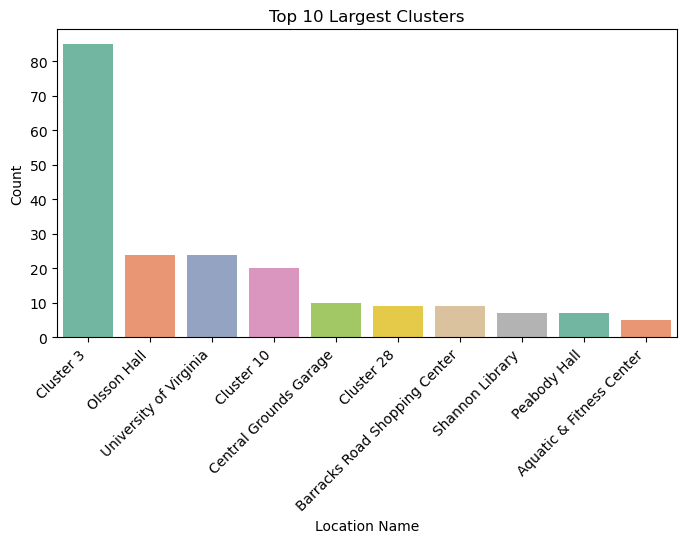

In [ ]:
df_cluster_counts = pd.read_csv(folder + "/cluster_counts.csv")
places = pd.read_csv(folder + '/places_info.csv')

df_cluster_counts = df_cluster_counts[df_cluster_counts["cluster"] != -1]
top_clusters = df_cluster_counts['cluster'].value_counts().head(10)

cluster_names = places.set_index("cluster_id")["place_name"].to_dict()
labels = [cluster_names.get(cluster_id, f"Cluster {int(cluster_id)}") for cluster_id in top_clusters.index]

# Bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=labels, y=top_clusters.values, palette="Set2")
plt.xlabel("Location Name")
plt.ylabel("Count")
plt.title("Top 10 Largest Clusters")
plt.xticks(rotation=45, ha="right")
plt.show()

# Based on the bar chart can see most frequented locations in the past month
# Cluster 3 is my room at uva
# Cluster 10 is my friend's house at uva
# Cluster 28 is my house in nova
# I honestly can't tell why Peabody Hall is on there, I've never been inside and I can't tell if its because of clustering or if my location is weird?
